<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/06-21/litao3_current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [ ]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 428, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 428 (delta 115), reused 33 (delta 13), pack-reused 197
Receiving objects: 100% (428/428), 18.24 MiB | 7.12 MiB/s, done.
Resolving deltas: 100% (191/191), done.


'/content'

# 21-06-24 LiTaO3 Current measurement

Measurement of the current without any gating nor liquid on one of our sample

Voltage : 1V







# Base Time
06/21/2024 12:42:09

In [ ]:
%cd "/content/gator/data/06-21/"

/content/gator/data/06-21


In [ ]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [ ]:
prep_csv('defbuffer1_0621_141313.csv')
df2 = pd.read_csv('defbuffer1_0621_141313.csv')

Fill Mode,1



In [ ]:
df2

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,2.054503e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.001077,Volt DC,0.01,F,2W,F,F,0.000000
1,6.240650e-11,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,-0.000477,Volt DC,0.01,F,2W,F,F,0.371669
2,-2.145693e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.005878,Volt DC,0.01,F,2W,F,F,0.974874
3,-4.509003e-11,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,-0.000197,Volt DC,0.01,F,2W,F,F,1.346557
4,3.617789e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.001178,Volt DC,0.01,F,2W,F,F,1.949721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23253,6.368991e-07,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.999964,Volt DC,1.00,T,2W,F,F,1833.512614
23254,6.366418e-07,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.999965,Volt DC,1.00,T,2W,F,F,1833.581929
23255,6.363639e-07,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.999965,Volt DC,1.00,T,2W,F,F,1833.651268
23256,6.360601e-07,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.999964,Volt DC,1.00,T,2W,F,F,1833.720587


In [ ]:
# Time (s)
T = df2['Relative Time']

# Current (mA)
I = df2['Reading'] * 1e9

# Potential (mV)
V = df2['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

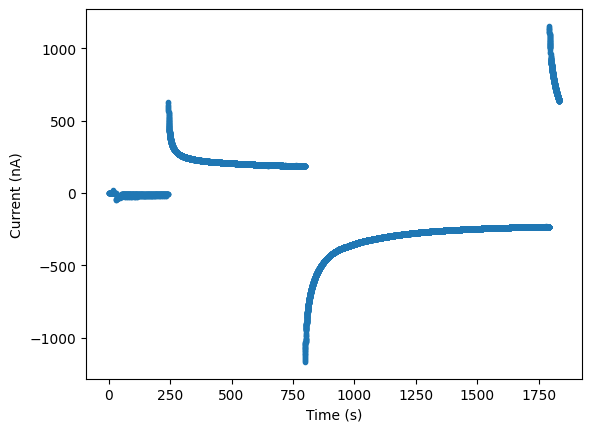

In [ ]:
cut1 = 0
cut2 = len(T)
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

We can see the current decreases and increases, depending on the sign of the voltage (-/+1V).
Indeed, the ions that have been "trapped" in our sample go from one side, to the other side (src to drain), and then backwards (drn to src).
Drain and source being each one of the electrodes linked to our samples with silver paste


In [ ]:
df_new = df2[['Relative Time', 'Value', 'Reading']]
df_new.loc[:, 'Reading'] = df_new['Reading'] * 1e9
df_new.loc[:, 'Value'] = df_new['Value'] * 100
df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)

<ipython-input-10-b3a59811220e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)


In [ ]:
# prompt: generately plotly express scatter plots of current and voltage over time from df_new

# fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)", "Vds (1e-2 V)"])
fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)"])
fig.show()